# Customer churn data EDA - Pandas
- Dependent variable: Churn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
tc_data = pd.read_csv("/home2/MyNotes/Python/DataSets/CustomerChurn/telecomChurn.csv",
                             sep=",",
                             header=0)
tc_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupportYes,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,0,0,1,1,45,1,1,81.00,3533.60,No,...,1,0,1,0,1,0,1,0,0,1
1,1,0,0,0,4,1,1,81.00,340.85,Yes,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,1,18,1,1,20.25,401.95,No,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,53,1,1,93.45,4872.20,No,...,1,0,1,0,1,1,0,0,1,0
4,0,1,1,0,3,1,1,74.60,239.05,No,...,0,0,0,0,0,0,0,0,0,0


In [2]:
tc_data.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                                int64
tenure                                    int64
PhoneService                              int64
PaperlessBilling                          int64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                    object
MultipleLinesNo phone service             int64
MultipleLinesYes                          int64
InternetServiceFiber optic                int64
InternetServiceNo                         int64
OnlineSecurityNo internet service         int64
OnlineSecurityYes                         int64
OnlineBackupNo internet service           int64
OnlineBackupYes                           int64
DeviceProtectionNo internet service       int64
DeviceProtectionYes                       int64
TechSupportNo internet service          

In [3]:
tc_data.count() # we find missing values for TotalCharges

gender                                  4930
SeniorCitizen                           4930
Partner                                 4930
Dependents                              4930
tenure                                  4930
PhoneService                            4930
PaperlessBilling                        4930
MonthlyCharges                          4930
TotalCharges                            4924
Churn                                   4930
MultipleLinesNo phone service           4930
MultipleLinesYes                        4930
InternetServiceFiber optic              4930
InternetServiceNo                       4930
OnlineSecurityNo internet service       4930
OnlineSecurityYes                       4930
OnlineBackupNo internet service         4930
OnlineBackupYes                         4930
DeviceProtectionNo internet service     4930
DeviceProtectionYes                     4930
TechSupportNo internet service          4930
TechSupportYes                          4930
StreamingT

In [4]:
# we check which rows have null values
tc_data[tc_data.isnull().any(axis=1)] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupportYes,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
361,0,0,1,1,0,0,0,56.05,NaN,No,...,1,0,1,0,0,0,1,1,0,0
999,1,0,1,1,0,1,0,25.75,NaN,No,...,0,1,0,1,0,0,1,0,0,1
2486,1,0,1,1,0,1,0,25.35,NaN,No,...,0,1,0,1,0,0,1,0,0,1
3534,1,0,1,1,0,1,0,19.85,NaN,No,...,0,1,0,1,0,0,1,0,0,1
4235,0,0,1,1,0,1,0,20.00,NaN,No,...,0,1,0,1,0,0,1,0,0,1
4605,1,0,1,1,0,1,1,19.70,NaN,No,...,0,1,0,1,0,1,0,0,0,1


In [5]:
# Looks like these are new customers as the tenure is zero. We can update the MonthlyCharges into TotalCharges
tc_data["TotalCharges"] = tc_data["TotalCharges"].fillna(value=tc_data["MonthlyCharges"])

In [6]:
# Verify
tc_data.head(10)
tc_data[tc_data.isnull().any(axis=1)] # we check which rows have null values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupportYes,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check


In [7]:
tc_data["Churn"].value_counts()

No     3651
Yes    1279
Name: Churn, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

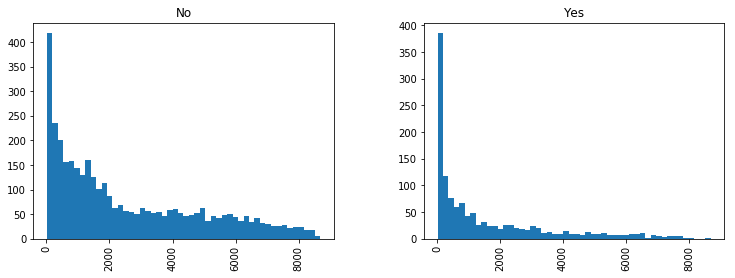

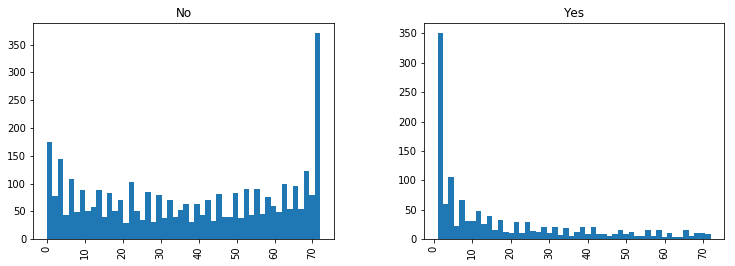

In [8]:

tc_data.hist(column="TotalCharges", by="Churn", bins=50,figsize=(12,4))
tc_data.hist(column="tenure",by="Churn", bins=50,figsize=(12,4))
plt.show

In [9]:
def bucktenure(t):
    if t <= 10:
        return("LessThan10")
    if t > 10 and t <=20:
        return("10-20")
    if t > 20 and t <=30:
        return("20-30")
    if t > 30 and t <=40:
        return("30-40")
    if t > 40 and t <=50:
        return("40-50")
    if t > 50 and t <=60:
        return("50-60")
    if t > 60 and t <=70:
        return("60-70")
    if t > 70 and t <=80:
        return("70-80")

In [10]:
tc_data["tenure_bktd"] = tc_data["tenure"].apply(lambda x:bucktenure(x))

In [11]:
import seaborn as sns

/home2/BigData/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

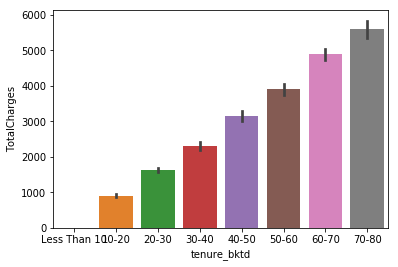

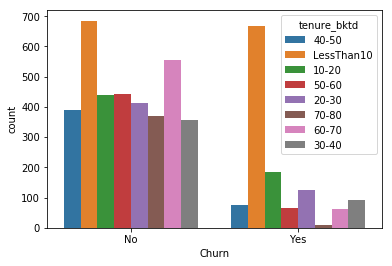

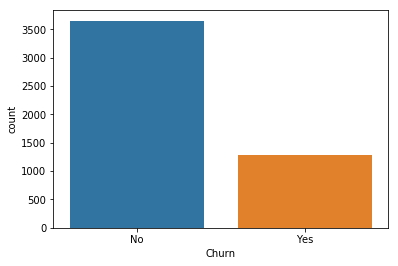

<Figure size 432x288 with 0 Axes>

In [12]:
# Graphs to make
# 1. churn vs total bill 
# 2. churn vs tenure
# 3. Churn vs gender
# 4. Churn vs dependents
# 5. Churn vs senior citizen
orderList = ["Less Than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
sns.barplot(x=tc_data["tenure_bktd"],y=tc_data["TotalCharges"],order=orderList)
plt.figure()
sns.countplot(x=tc_data["Churn"],hue=tc_data["tenure_bktd"])
plt.figure()
sns.countplot(x="Churn",data=tc_data)
plt.figure()

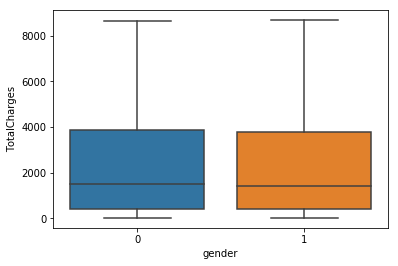

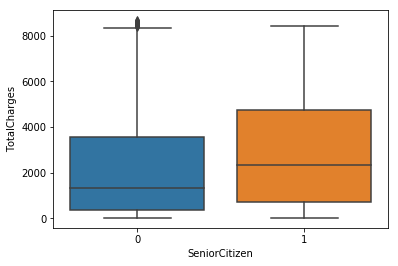

In [18]:
sns.boxplot(y="TotalCharges",x="gender",data=tc_data)
plt.figure()
sns.boxplot(y="TotalCharges",x="SeniorCitizen",data=tc_data)
